In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv('apple_stock_features.csv')


In [9]:
df.head()

,Price,O_p_e_n,H_i_g_h,L_o_w,C_l_o_s_e,V_o_l_u_m_e,Y_e_a_r,M_o_n_t_h,D_a_y,D_a_y_O_f_W_e_e_k,R_e_t_u_r_n,L_o_g___R_e_t_u_r_n,M_A_2_0,M_A_5_0,M_A_2_0_0,V_o_l_a_t_i_l_i_t_y
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-02,17.27208509413738,17.314046576309632,17.158321968248117,17.19282341003418,234684800,2014.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-03,17.184435977668635,17.21054446489701,16.79807585070129,16.81517219543457,392467600,2014.0,1.0,3.0,4.0,-0.021966,-0.022210,NaN,NaN,NaN,NaN
4,2014-01-06,16.70544425881098,16.996067088352163,16.5857748631176,16.9068603515625,412610800,2014.0,1.0,6.0,0.0,0.005453,0.005438,NaN,NaN,NaN,NaN


In [10]:
# Remove all underscores in column names
df.columns = [col.replace("_", "") for col in df.columns]


In [11]:
df.head()

,Price,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,Return,LogReturn,MA20,MA50,MA200,Volatility
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-02,17.27208509413738,17.314046576309632,17.158321968248117,17.19282341003418,234684800,2014.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-03,17.184435977668635,17.21054446489701,16.79807585070129,16.81517219543457,392467600,2014.0,1.0,3.0,4.0,-0.021966,-0.022210,NaN,NaN,NaN,NaN
4,2014-01-06,16.70544425881098,16.996067088352163,16.5857748631176,16.9068603515625,412610800,2014.0,1.0,6.0,0.0,0.005453,0.005438,NaN,NaN,NaN,NaN


In [12]:
df = pd.read_csv('apple_stock_features.csv', header=[0, 1])


In [13]:
df.head()

,Price,O_p_e_n,H_i_g_h,L_o_w,C_l_o_s_e,V_o_l_u_m_e,Y_e_a_r,M_o_n_t_h,D_a_y,D_a_y_O_f_W_e_e_k,R_e_t_u_r_n,L_o_g___R_e_t_u_r_n,M_A_2_0,M_A_5_0,M_A_2_0_0,V_o_l_a_t_i_l_i_t_y
,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1,Unnamed: 13_level_1,Unnamed: 14_level_1,Unnamed: 15_level_1
0,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,17.272085,17.314047,17.158322,17.192823,234684800.0,2014.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,17.184436,17.210544,16.798076,16.815172,392467600.0,2014.0,1.0,3.0,4.0,-0.021966,-0.022210,NaN,NaN,NaN,NaN
3,2014-01-06,16.705444,16.996067,16.585775,16.906860,412610800.0,2014.0,1.0,6.0,0.0,0.005453,0.005438,NaN,NaN,NaN,NaN
4,2014-01-07,16.918986,16.969961,16.720056,16.785952,317209200.0,2014.0,1.0,7.0,1.0,-0.007151,-0.007177,NaN,NaN,NaN,NaN


In [14]:
# Flatten MultiIndex columns cleanly
df.columns = [
    f"{a}_{b}" if b and not str(b).startswith("Unnamed") else f"{a}"
    for a, b in df.columns
]

# Remove any extra underscores (optional)
df.columns = [col.replace("_", "") for col in df.columns]


In [15]:
df.head()

,PriceTicker,OpenAAPL,HighAAPL,LowAAPL,CloseAAPL,VolumeAAPL,Year,Month,Day,DayOfWeek,Return,LogReturn,MA20,MA50,MA200,Volatility
0,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,17.272085,17.314047,17.158322,17.192823,234684800.0,2014.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,17.184436,17.210544,16.798076,16.815172,392467600.0,2014.0,1.0,3.0,4.0,-0.021966,-0.022210,NaN,NaN,NaN,NaN
3,2014-01-06,16.705444,16.996067,16.585775,16.906860,412610800.0,2014.0,1.0,6.0,0.0,0.005453,0.005438,NaN,NaN,NaN,NaN
4,2014-01-07,16.918986,16.969961,16.720056,16.785952,317209200.0,2014.0,1.0,7.0,1.0,-0.007151,-0.007177,NaN,NaN,NaN,NaN


In [16]:
print(df.columns.tolist())


['PriceTicker', 'OpenAAPL', 'HighAAPL', 'LowAAPL', 'CloseAAPL', 'VolumeAAPL', 'Year', 'Month', 'Day', 'DayOfWeek', 'Return', 'LogReturn', 'MA20', 'MA50', 'MA200', 'Volatility']


In [17]:
df.reset_index(inplace=True)


In [18]:
print(df.columns.tolist())  # Should now contain 'Date'


['index', 'PriceTicker', 'OpenAAPL', 'HighAAPL', 'LowAAPL', 'CloseAAPL', 'VolumeAAPL', 'Year', 'Month', 'Day', 'DayOfWeek', 'Return', 'LogReturn', 'MA20', 'MA50', 'MA200', 'Volatility']


In [20]:
df[[ 'index', 'PriceTicker']].head()


,index,PriceTicker
0,0,Date
1,1,2014-01-02
2,2,2014-01-03
3,3,2014-01-06
4,4,2014-01-07


In [21]:
df = df[1:]  # drop the first row that has the 'Date' label


In [22]:
df.rename(columns={'PriceTicker': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipython-input-22-2106678541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'PriceTicker': 'Date'}, inplace=True)
/tmp/ipython-input-22-2106678541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [23]:
df.drop(columns=[ 'index'], inplace=True)


/tmp/ipython-input-23-506105566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[ 'index'], inplace=True)


In [24]:
print(df.columns.tolist())
df.head()


['Date', 'OpenAAPL', 'HighAAPL', 'LowAAPL', 'CloseAAPL', 'VolumeAAPL', 'Year', 'Month', 'Day', 'DayOfWeek', 'Return', 'LogReturn', 'MA20', 'MA50', 'MA200', 'Volatility']


,Date,OpenAAPL,HighAAPL,LowAAPL,CloseAAPL,VolumeAAPL,Year,Month,Day,DayOfWeek,Return,LogReturn,MA20,MA50,MA200,Volatility
1,2014-01-02,17.272085,17.314047,17.158322,17.192823,234684800.0,2014.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,17.184436,17.210544,16.798076,16.815172,392467600.0,2014.0,1.0,3.0,4.0,-0.021966,-0.022210,NaN,NaN,NaN,NaN
3,2014-01-06,16.705444,16.996067,16.585775,16.906860,412610800.0,2014.0,1.0,6.0,0.0,0.005453,0.005438,NaN,NaN,NaN,NaN
4,2014-01-07,16.918986,16.969961,16.720056,16.785952,317209200.0,2014.0,1.0,7.0,1.0,-0.007151,-0.007177,NaN,NaN,NaN,NaN
5,2014-01-08,16.747708,16.957517,16.743980,16.892244,258529600.0,2014.0,1.0,8.0,2.0,0.006332,0.006312,NaN,NaN,NaN,NaN


In [25]:
# Use only the closing price for LSTM
data = df[['CloseAAPL']].values

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("Original shape:", data.shape)
print("Scaled shape:", scaled_data.shape)


Original shape: (2767, 1)
Scaled shape: (2767, 1)


In [26]:
import numpy as np
sequence_length = 60


X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (2707, 60, 1)
Output shape: (2707, 1)


In [27]:
# 80% train, 20% test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2165, 60, 1), Test shape: (542, 60, 1)


In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0108 - val_loss: 6.7315e-04
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.4973e-04 - val_loss: 0.0011
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0625e-04 - val_loss: 7.8117e-04
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1038e-04 - val_loss: 0.0018
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9171e-04 - val_loss: 9.1700e-04
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9627e-04 - val_loss: 9.0694e-04
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6547e-04 - val_loss: 0.0011
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7829e-04 - val_loss: 7.5519e-04
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4728e-04 - val_loss: 4.8743e-04
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6680e-04 - val_loss: 8.9202e-04
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3093e-04 - val_loss

In [29]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


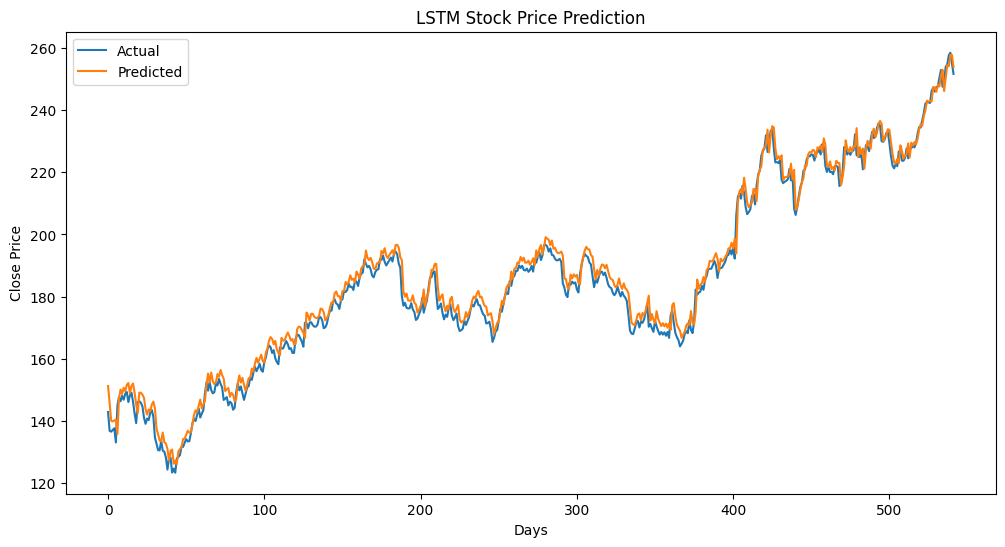

In [30]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
